In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from import_KK import *
DeviceStrategy_GPU()
from module_KTX_KK import * 
from preprocessing_KK import *
from preprocessing_project_KK import *
from description_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *
from visualization_KK import *


=========== GPU Strategy ===========
Detected GPUs:
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
TF using MirroredStrategy with 2 GPUs:
 ['/GPU:0', '/GPU:1']


======= GPU / CUDA / STATUS ========
Cuda Ready?        True
CUDA Version:      12.5.1
cuDNN Version:     9

TF Version:        2.19.0
Keras Version:     3.10.0
True
Torch Version:       2.7.1+cu126
Torch CUDA Version:  12.6
Torch cuDNN Version: 90501

Torch GPUs Available: 2
Use the GPU: NVIDIA GeForce RTX 3090



In [3]:
def preprocess_data(df, excluded_columns, test_size, random_state):  
    # 수송인원 높은 역 필터링
    top_stations = ['홍대입구', '잠실', '강남', '서울역', '신림', '고속터미널', '신도림', '역삼', '선릉', 
                  '을지로입구', '종각', '가산디지털단지', '서울대입구', '성수', '혜화', '양재', 
                   '사당', '명동', '압구정', '수유', '연신내', '건대입구', '합정', '신사', '광화문', 
                    '시청', '여의도', '경복궁', '안국', '종로3가'] 
    
    #top_stations = ['서울대입구','선릉','성수','신림','신도림'] 
    
    df = df[df['역명'].isin(top_stations)].reset_index(drop=True)
    
    selected_columns = df.columns
    
    # 제외할 변수 지정
    # excluded_columns = ['역명', '면적', '승강장혼잡도2', '승강장혼잡도1', '날짜', '수송인원수', 'L_total', 'λ_total',
    #                     'W_total', 'W_환승', 'λ_환승', 'W_승차', 'λ_승차', '승강장_혼잡도', '요일구분','승하차인원','일별_승하차인원_합','호선'
    #                     ,'시간대별_환승_승객_수','시간대별_승하차_비율']
    
    feature_columns = [col for col in selected_columns if col not in excluded_columns]
    
    # 독립 변수와 종속 변수 분리
    X = df[feature_columns]
    y = df['승강장_혼잡도']
    
    # 학습용과 테스트용 데이터로 분할
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # 스케일링
    # scaler = StandardScaler()
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 결과를 딕셔너리 형태로 반환
    data = {
        'X_train': X_train,
        'Y_train': Y_train,
        'X_test': X_test,
        'Y_test': Y_test,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'feature_columns': feature_columns,
        'scaler': scaler,  # 추가
        'df_train': df.iloc[X_train.index],
        'df_test': df.iloc[X_test.index]
    }
    
    return data, feature_columns

# Hyperparameters

In [4]:
# Data
FOLDER_GDM, FOLDER_GDS = get_google_drivelocation(gdrive='z', glocation=os.path.join('Research', 'SavedData', 'KoSubway'))
FOLDER_LOCATION = FOLDER_GDM
FILENAME = 'df_prep_20241112_SCI.csv'
FILE_LOCATION = os.path.join(FOLDER_LOCATION, FILENAME)

# Preprocessing
Y_colname = '승강장_혼잡도'
X_reverse = None
X_nullmax = None
X_nullmin = None
X_dummy = None
X_encoding = None
X_delYrelated = None
X_del = ['호선', '역명', '승강장혼잡도2', '승강장혼잡도1', '날짜', '수송인원수', 'L_total', 'λ_total',
        'W_total', 'W_환승', 'λ_환승', 'W_승차', 'λ_승차', '승강장_혼잡도', '요일구분','승하차인원',
        '승하차인원차', '상선 혼잡도', '하선 혼잡도', '일별_승하차인원_합',
        '시간대별_환승_승객_수','시간대별_승하차_비율']

TEST_SIZE = 0.2
RANDOM_STATE = 123
# CLASS_STAT = True
## 'RandomUnderSampler' <<< 'TomekLinks' << 'CondensedNearestNeighbour' < 'OneSidedSelection'
## 'SMOTE' <<< 'SMOTETomek' << 'BorderlineSMOTE' < 'ADASYN', 'auto'
SAMPLING_METHOD = 'auto'
## 'minority', 'not majority', 'not minority', 'all', 'auto'
SAMPLING_STRATEGY = 'auto'    # 'minority', 'not majority', 'not minority', 'all', 'auto'
SCALER = 'minmax'
# LABEL_LIST = ['Non-Suicide', 'Suicide']
LABEL_LIST = None

# Model
## Common
TUNE_TRIALS = 10
CV_SPLITS = 5
## ML
TUNE_METRIC = 'auto'
## DL
tf.random.set_seed(123)
NODE_MLP = [128, 256, 128, 64, 32, 10]
NODE_CNN1 = [128, 256, 128]
NODE_CNN2 = [64, 32, 10]
WEIGHT_METHOD = None   # None, 'class', 'sample'
VALIDATION_SPLIT = None
BATCH_SIZE = 64
EPOCHS = 1000
VERBOSE = 0
METRIC = 'val_Accuracy'
TUNE_METRIC_DL = 'val_Accuracy' # 'AUC', 'Accuracy', 'F1-score', 'loss', 'val_AUC', 'val_Accuracy', 'val_F1-score', 'val_loss'
## Final + XAI
METRIC_FINAL = "F1-score"
SHAP = True
INTERACTION = True
INTERACTION_SAMPLES = 3000
# FEATURE_PERTURBATION = 'tree_path_dependent'    # 'tree_path_dependent', 'interventional'
X_TOP_DISPLAY = 50

# Save
SAVE_NAME_PREDSTATTR = 'DescriptiveStatistics_BinaryPredTrain.csv'
SAVE_NAME_PREDSTATTE = 'DescriptiveStatistics_BinaryPredTest.csv'

# Data Preprocessing

In [5]:
# 데이터로딩
df = pd.read_csv(FILE_LOCATION, encoding='utf-8-sig')
display(df.shape)

(1649016, 114)

In [6]:
# 전처리
df_prep, X_colname = preprocess_data(df, X_del, TEST_SIZE, RANDOM_STATE)
display(df_prep['X_train'].shape, df_prep['X_test'].shape)
X_train = df_prep['X_train'].copy()
X_test = df_prep['X_test'].copy()
Y_train = df_prep['Y_train'].copy()
Y_test = df_prep['Y_test'].copy()

(1319212, 92)

(329804, 92)

# Modeling

## Optimization

### Machine Learning

▶ Detected Task Type: [ Regression ] (Target: continuous)

   Running Algorithm: Linear Regression (Regression)
Learning...:  2026-01-04 02:07:12.064321


  0%|          | 0/10 [00:00<?, ?it/s]

[Linear Regression] Best Metric Score:  -0.004056648833524965
[Linear Regression] Best Tuning Parameters:  {'fit_intercept': False, 'n_jobs': -1}

Explanations...:  2026-01-04 02:11:38.307607
Explanations of Y:


,Features,Coef,Features,Coef
0,자동차등록대수(만대),"4,738.0747",년도_2022,"-1,807.2887"
1,수도권_인구밀도,"2,634.5645",수도권_인구(천명),"-1,726.1153"
2,서울_인구(천명),"2,479.6168",월_2,-26.3357
3,년도_2023,"1,153.3790",월_카운트,-10.7633
4,년도_2021,650.1984,월_4,-4.8092
5,서울_인구밀도,244.0343,월_6,-4.8091
6,월_1,5.9545,월_9,-4.8090
7,월_10,5.9545,월_11,-4.8087
8,월_12,5.9545,역_시간별_평균운행간격,-1.0632
9,월_8,5.9542,요일_Sunday,-0.5224


Performance Evaluations...:  2026-01-04 02:11:38.326366
Performance: 
   [Info] Linear Regression (Train): Data too large. Plotting every 132-th point. (Sampled 1/132, Total 1,319,212 → 9,995 points)


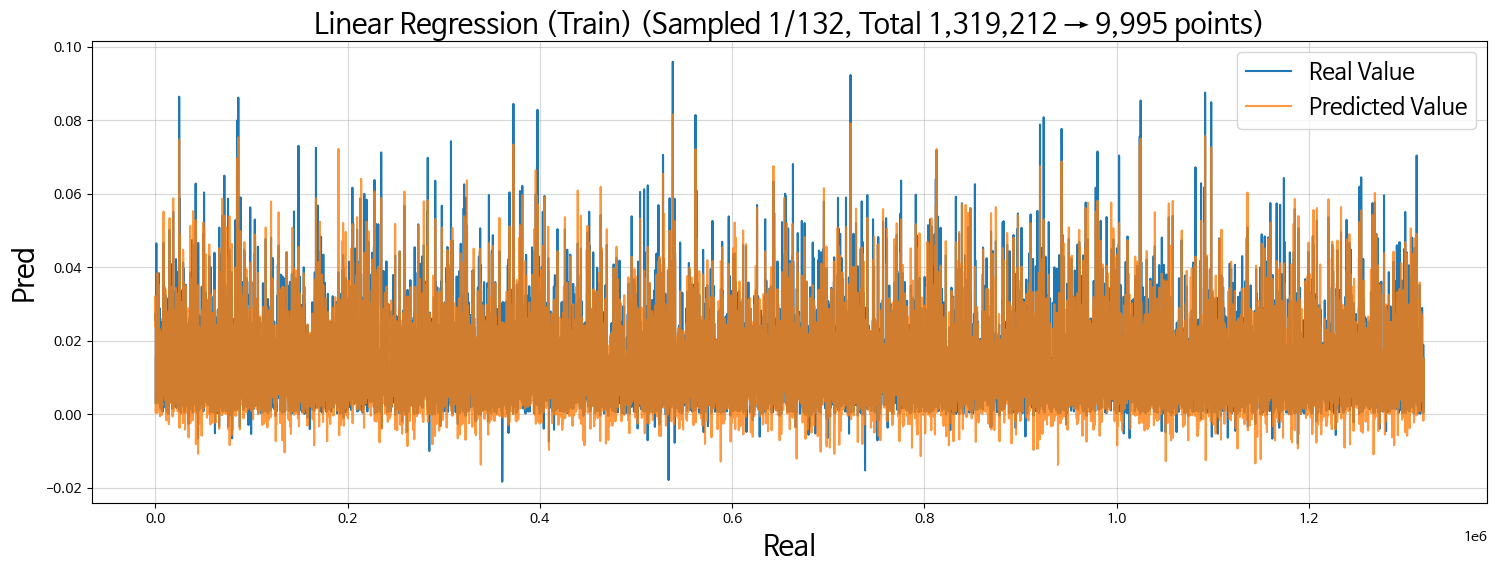

   [Info] Linear Regression (Test): Data too large. Plotting every 33-th point. (Sampled 1/33, Total 329,804 → 9,995 points)


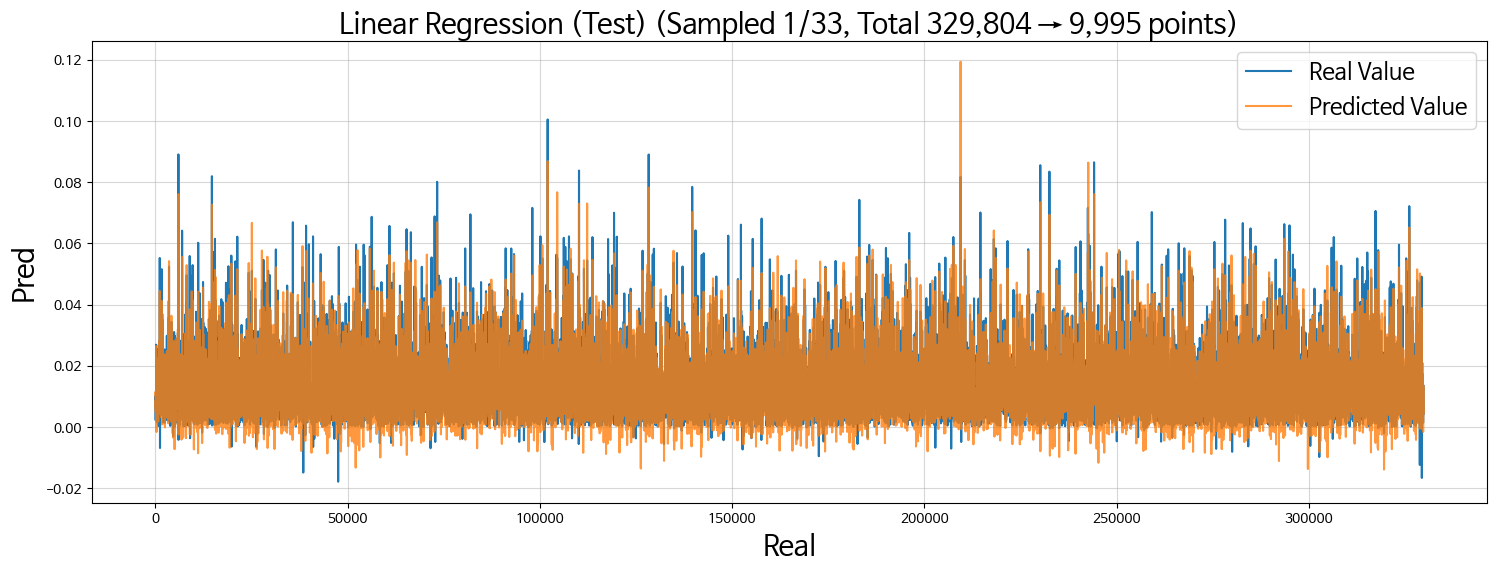

   [Save] Linear Regression Checkpoint Saved:
     - Model : /mnt/c/DataScience/[DIVE]/Project/SubwayPrediction/Model/best_model_Linear Regression_20260104_021139.pkl
     - Params: /mnt/c/DataScience/[DIVE]/Project/SubwayPrediction/Model/best_params_Linear Regression_20260104_021139.json

   Running Algorithm: Random Forest (Regression)
[Error] Unknown Algorithm or Not supported for Regression: Random Forest

   Running Algorithm: XGBoost (Regression)
Learning...:  2026-01-04 02:11:39.394370


  0%|          | 0/10 [00:00<?, ?it/s]

[XGBoost] Best Metric Score:  -0.003649490299530496
[XGBoost] Best Tuning Parameters:  {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.10291178006611294, 'subsample': 0.9659751747762907, 'colsample_bytree': 0.8876023531908601, 'min_child_weight': 2.0359188061741227, 'gamma': 1.0482742152131004, 'reg_alpha': 0.00172228785805584, 'reg_lambda': 2.4326889795213988e-05, 'random_state': 123, 'n_jobs': -1, 'tree_method': 'hist', 'verbosity': 0}

Explanations...:  2026-01-04 02:15:15.969275
Explanations of Y:


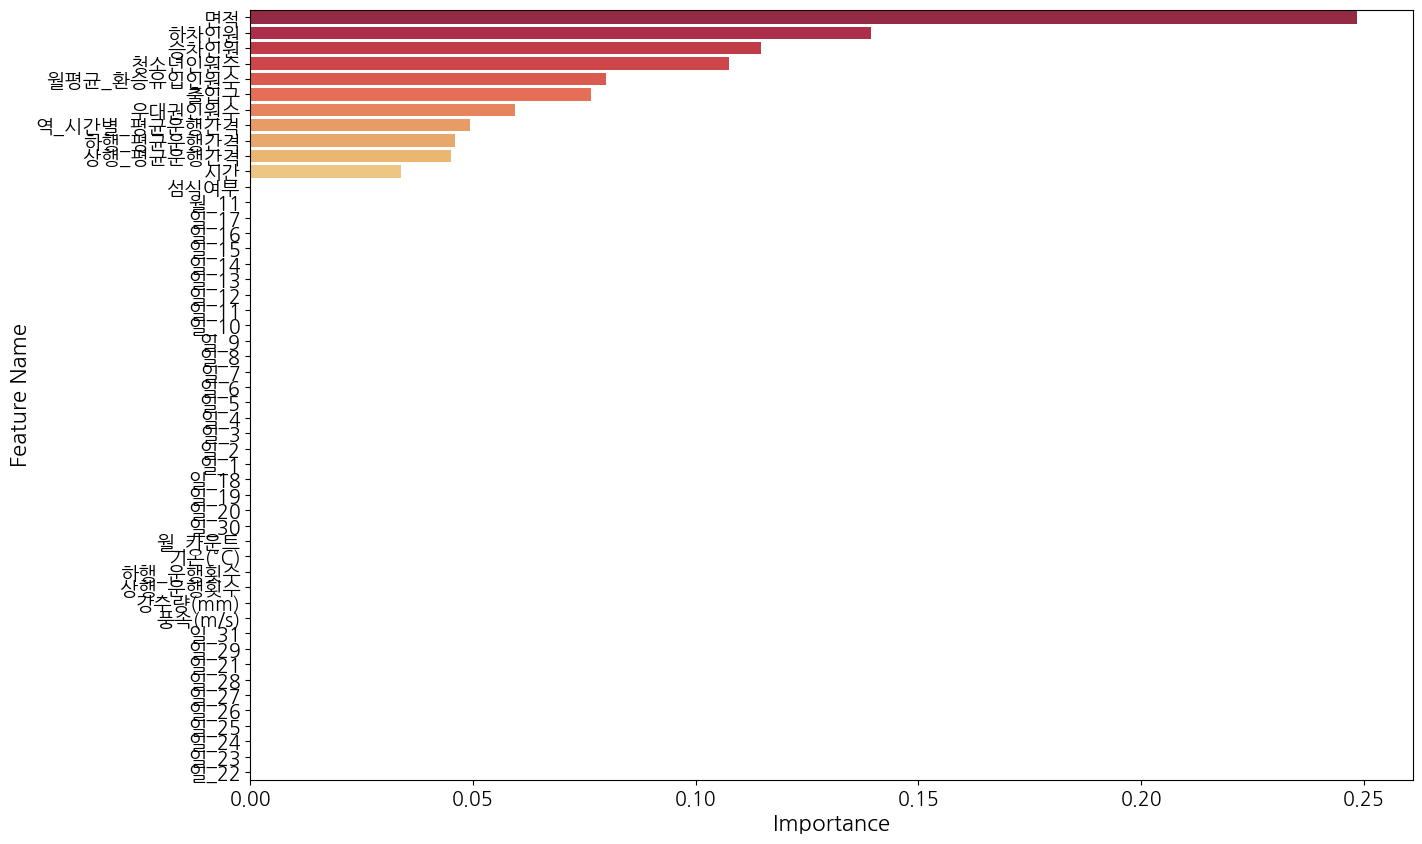

Performance Evaluations...:  2026-01-04 02:15:16.408444
Performance: 
   [Info] XGBoost (Train): Data too large. Plotting every 132-th point. (Sampled 1/132, Total 1,319,212 → 9,995 points)


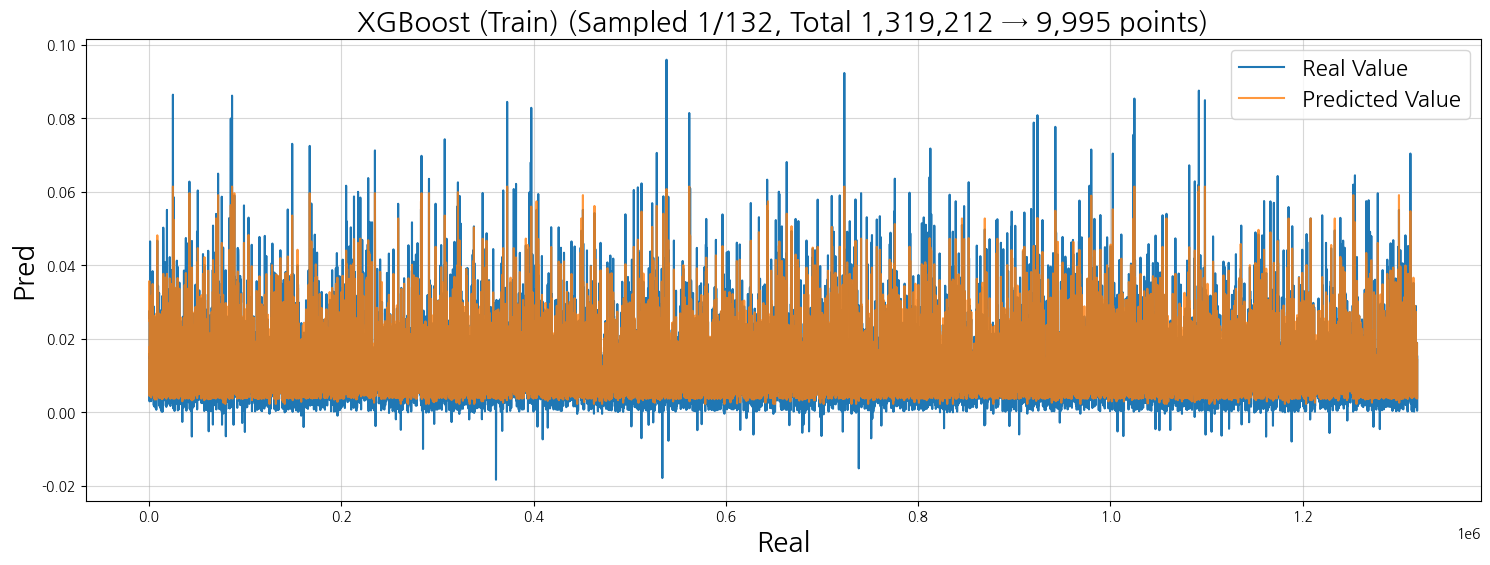

   [Info] XGBoost (Test): Data too large. Plotting every 33-th point. (Sampled 1/33, Total 329,804 → 9,995 points)


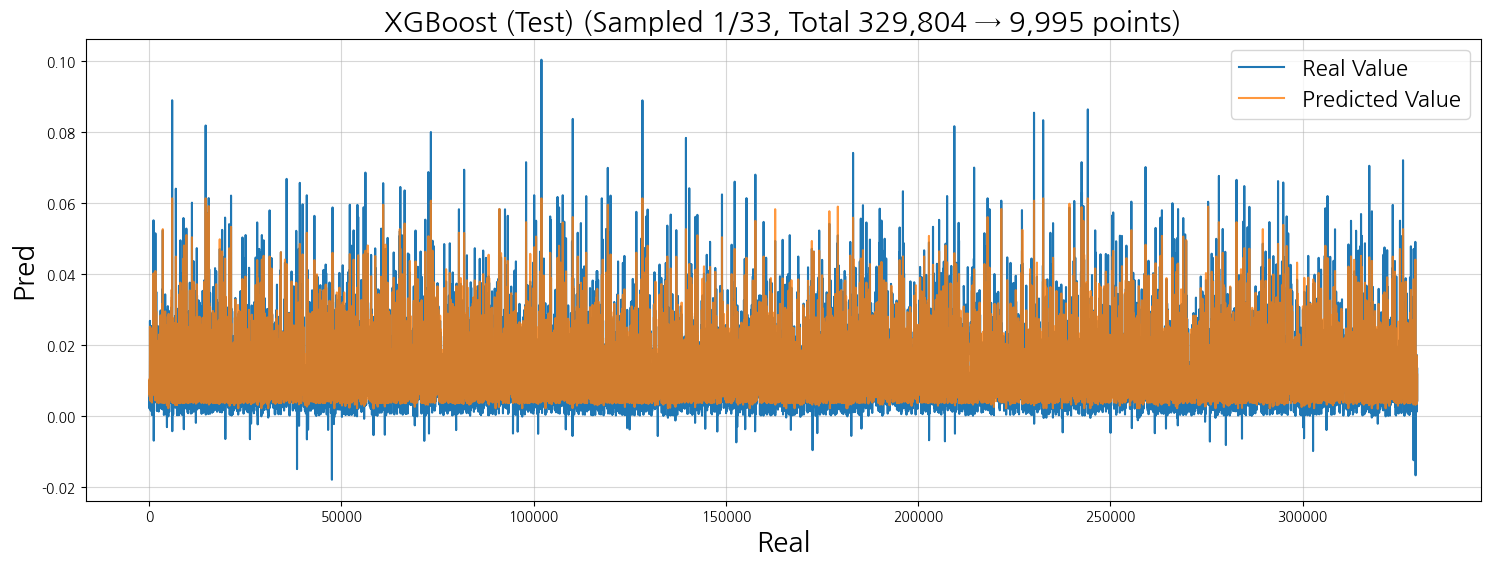

   [Save] XGBoost Checkpoint Saved:
     - Model : /mnt/c/DataScience/[DIVE]/Project/SubwayPrediction/Model/best_model_XGBoost_20260104_021517.pkl
     - Params: /mnt/c/DataScience/[DIVE]/Project/SubwayPrediction/Model/best_params_XGBoost_20260104_021517.json

   Running Algorithm: LightGBM (Regression)
Learning...:  2026-01-04 02:15:17.622512


  0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] Best Metric Score:  -0.0029190305535582058
[LightGBM] Best Tuning Parameters:  {'n_estimators': 250, 'learning_rate': 0.05597805085284553, 'num_leaves': 159, 'max_depth': 28, 'min_child_samples': 96, 'subsample': 0.9659991291799833, 'colsample_bytree': 0.9590680993204413, 'min_split_gain': 0.212383529644533, 'extra_trees': True, 'reg_alpha': 0.030213343121301483, 'reg_lambda': 0.006264335108532157, 'random_state': 123, 'n_jobs': -1, 'verbose': -1}

Explanations...:  2026-01-04 02:19:00.373009
Explanations of Y:


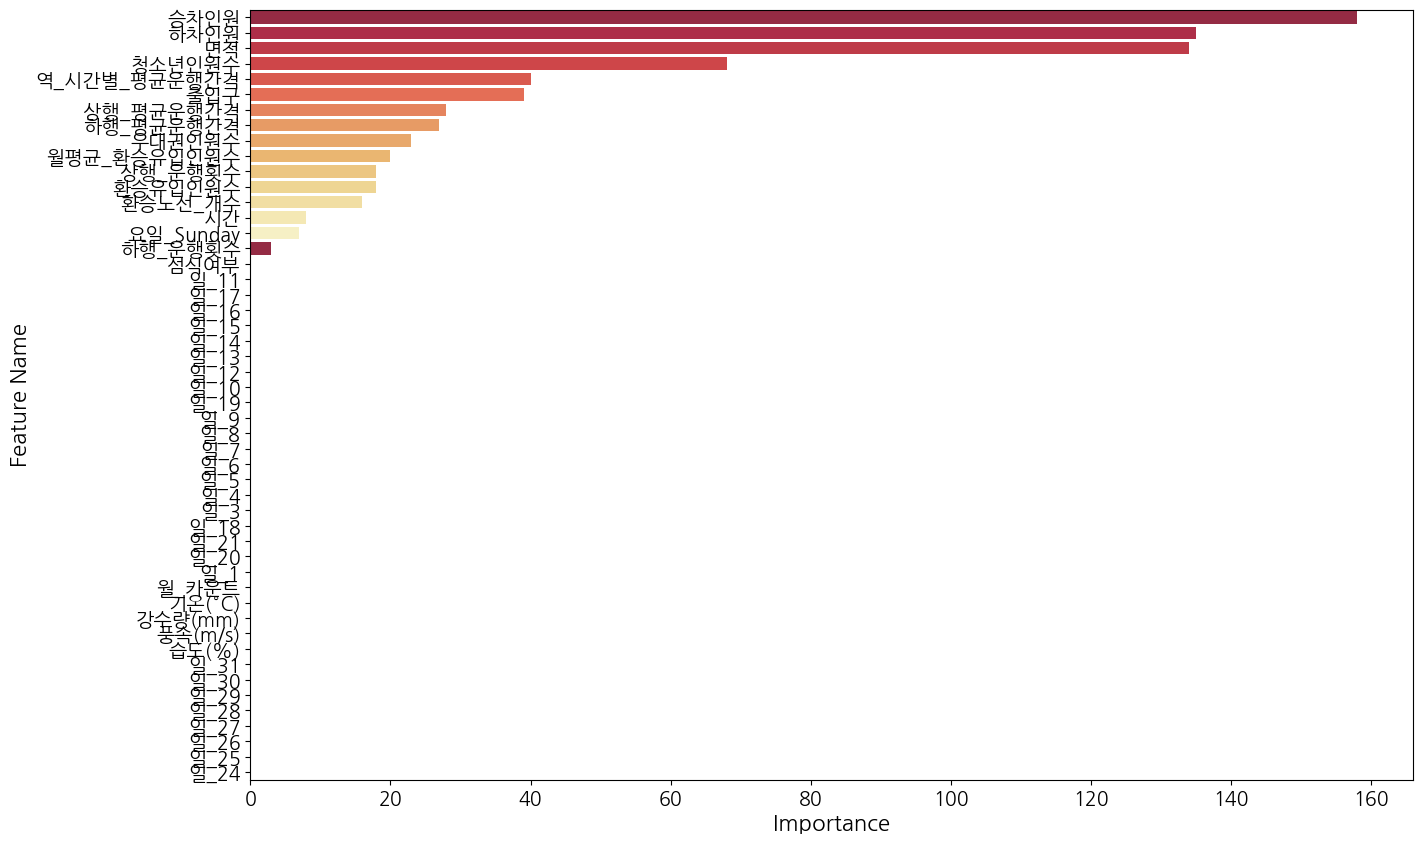

Performance Evaluations...:  2026-01-04 02:19:00.621578
Performance: 
   [Info] LightGBM (Train): Data too large. Plotting every 132-th point. (Sampled 1/132, Total 1,319,212 → 9,995 points)


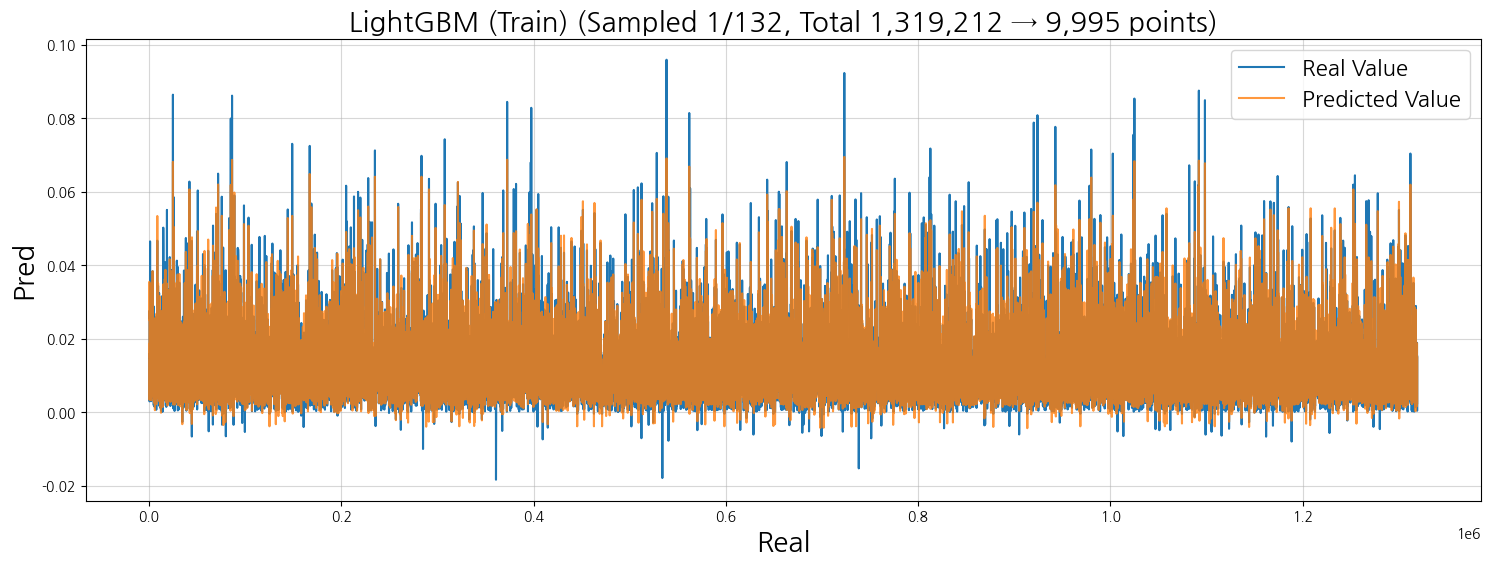

   [Info] LightGBM (Test): Data too large. Plotting every 33-th point. (Sampled 1/33, Total 329,804 → 9,995 points)


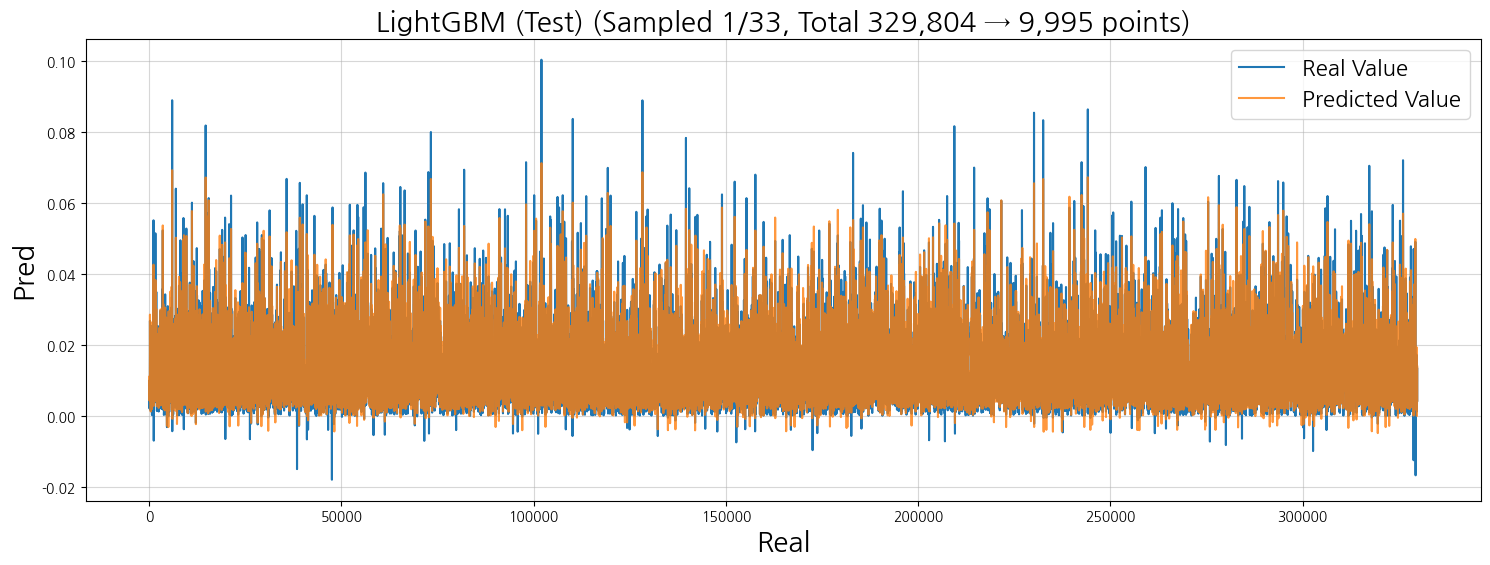

   [Save] LightGBM Checkpoint Saved:
     - Model : /mnt/c/DataScience/[DIVE]/Project/SubwayPrediction/Model/best_model_LightGBM_20260104_021901.pkl
     - Params: /mnt/c/DataScience/[DIVE]/Project/SubwayPrediction/Model/best_params_LightGBM_20260104_021901.json

   Running Algorithm: CatBoost (Regression)
Learning...:  2026-01-04 02:19:01.695366


  0%|          | 0/10 [00:00<?, ?it/s]

[CatBoost] Best Metric Score:  -0.00029945447604327023
[CatBoost] Best Tuning Parameters:  {'iterations': 600, 'depth': 9, 'learning_rate': 0.0706838226501885, 'l2_leaf_reg': 6.307454772400406, 'subsample': 0.7810553595002052, 'grow_policy': 'SymmetricTree', 'random_state': 123, 'verbose': 0, 'allow_writing_files': False}

Explanations...:  2026-01-04 02:49:01.675852
Explanations of Y:


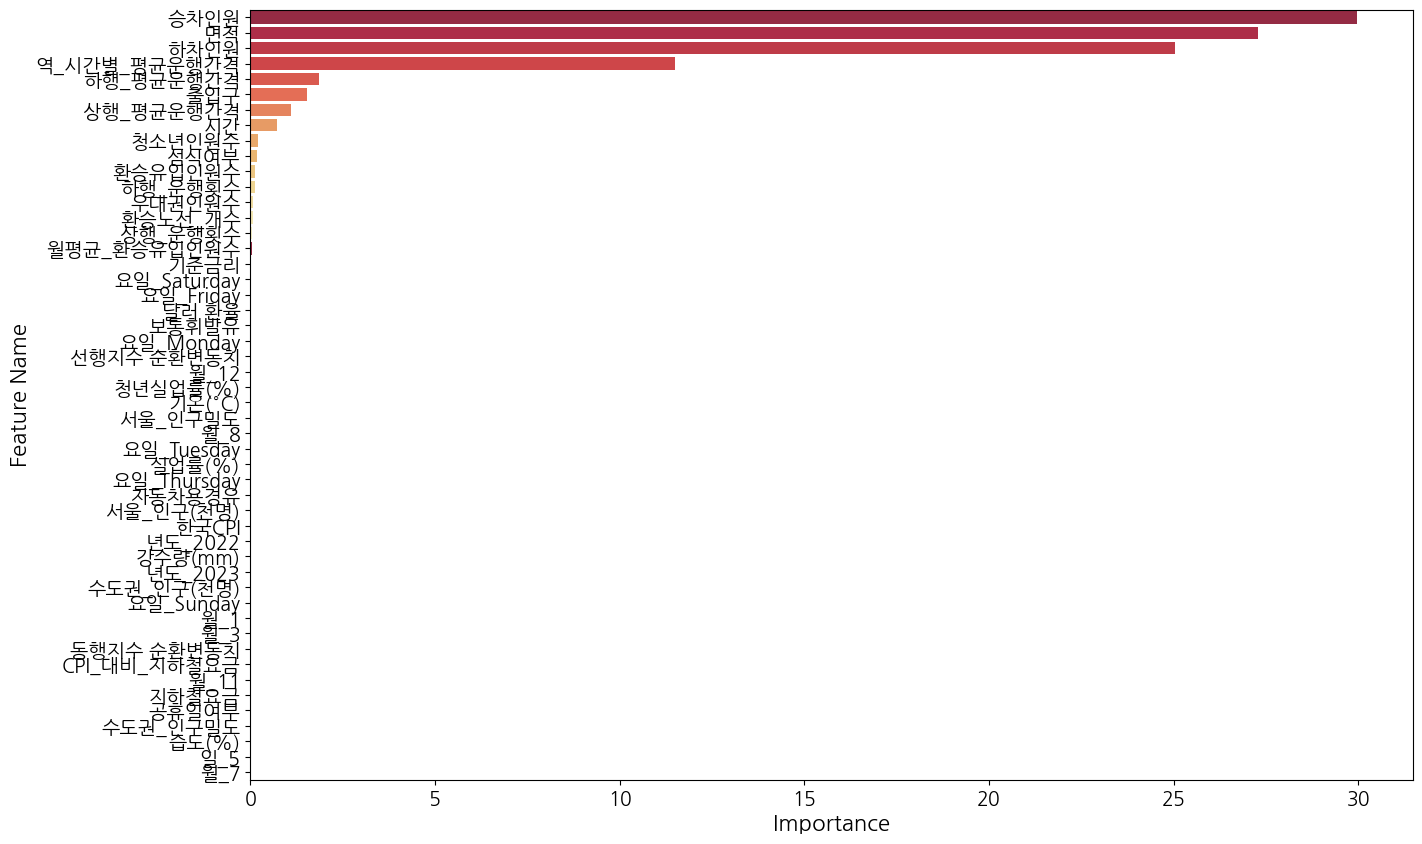

Performance Evaluations...:  2026-01-04 02:49:01.912342
Performance: 
   [Info] CatBoost (Train): Data too large. Plotting every 132-th point. (Sampled 1/132, Total 1,319,212 → 9,995 points)


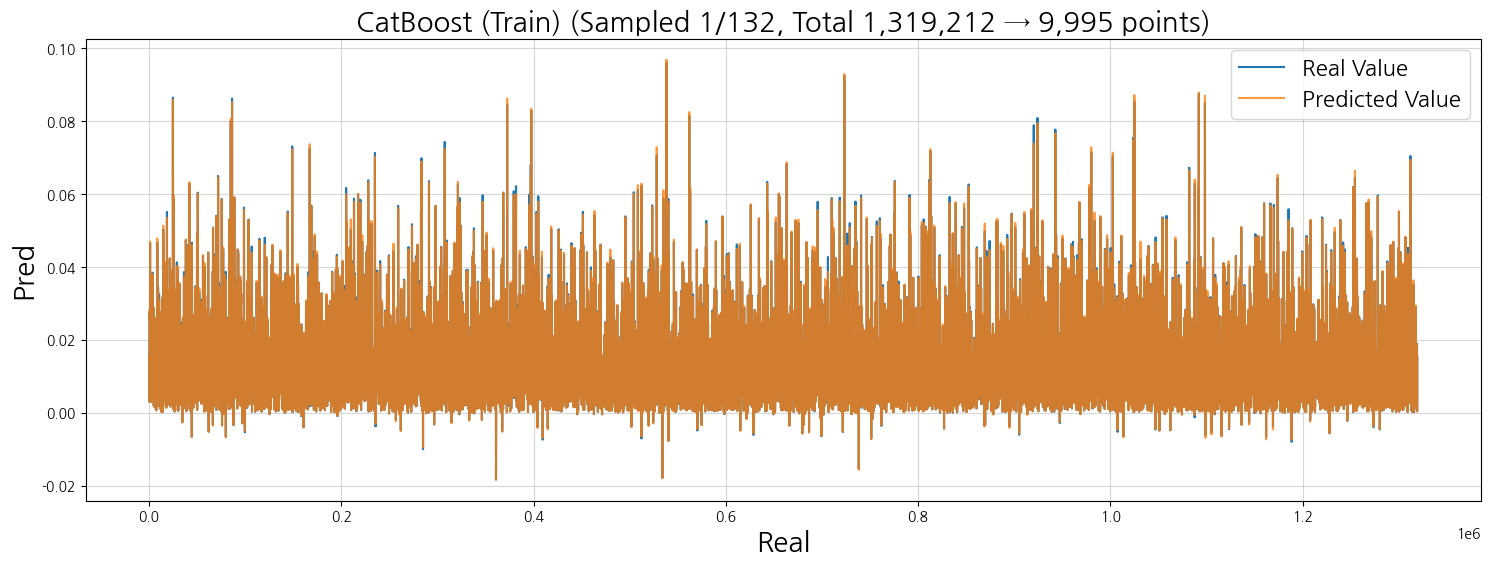

   [Info] CatBoost (Test): Data too large. Plotting every 33-th point. (Sampled 1/33, Total 329,804 → 9,995 points)


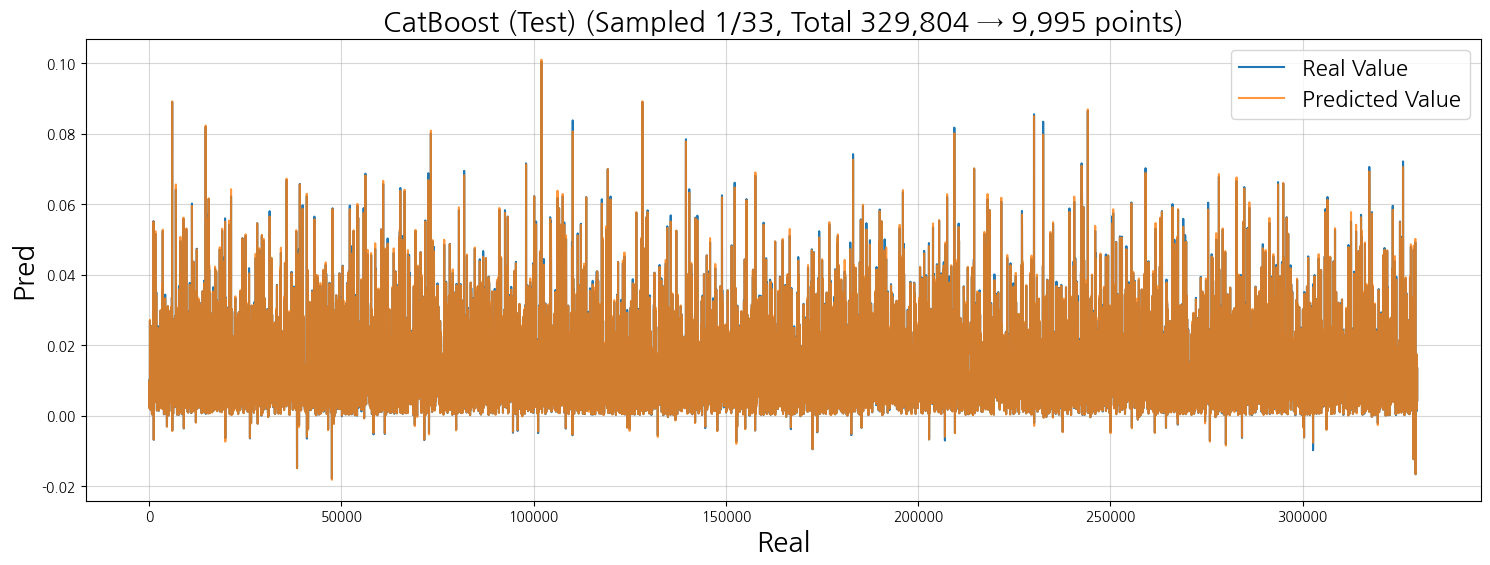

   [Save] CatBoost Checkpoint Saved:
     - Model : /mnt/c/DataScience/[DIVE]/Project/SubwayPrediction/Model/best_model_CatBoost_20260104_024902.pkl
     - Params: /mnt/c/DataScience/[DIVE]/Project/SubwayPrediction/Model/best_params_CatBoost_20260104_024902.json

   Modeling Completed. Summary of Performance (Regression)


,Algorithm,Dataset,RMSE,MSPE,MAE,MAPE,MedAE,MedAPE
0,Linear Regression,Train set,0.0041,"7,113.3864",0.0026,2.4130,0.0017,0.1599
1,Linear Regression,Test set,0.0041,"7,663.9787",0.0026,2.6249,0.0017,0.1601
2,Linear Regression,Entire population,0.0041,"7,223.5052",0.0026,2.4554,0.0017,0.1600
3,XGBoost,Train set,0.0034,"1,445.7451",0.0022,1.2803,0.0016,0.1463
4,XGBoost,Test set,0.0034,"1,124.4733",0.0022,1.3487,0.0016,0.1462
5,XGBoost,Entire population,0.0034,"1,381.4906",0.0022,1.2940,0.0016,0.1463
6,LightGBM,Train set,0.0028,"1,262.6018",0.0017,1.0526,0.0011,0.1130
7,LightGBM,Test set,0.0028,"1,361.6427",0.0017,1.1355,0.0011,0.1132
8,LightGBM,Entire population,0.0028,"1,282.4101",0.0017,1.0692,0.0011,0.1130
9,CatBoost,Train set,0.0003,2.5541,0.0002,0.0531,0.0001,0.0124


Saved total performance to: /mnt/c/DataScience/[DIVE]/Project/SubwayPrediction/Result/Performance(Total)_Regression.csv


In [7]:
# 알고리즘 리스트 지정 (원하는 것만 선택 가능)
algorithm_list = ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']

# ML 실행
results, scores_summary = modeling_ML(
    algos=algorithm_list,
    X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test,
    X_colname=X_colname,
    params=None, # 특정 알고리즘
    tune_trials=TUNE_TRIALS,
    cv_splits=CV_SPLITS,
    tune_metric=TUNE_METRIC,
    shap=not SHAP, 
    X_selected=None, # shap에서만 작동
    interaction=not INTERACTION,
    interaction_samples=INTERACTION_SAMPLES, 
    X_top_display=X_TOP_DISPLAY, 
    label_list=LABEL_LIST,
)

In [ ]:
# 알고리즘 리스트 지정 (원하는 것만 선택 가능)
algorithm_list = ['Random Forest']

# ML 실행
results, scores_summary = modeling_ML(
    algos=algorithm_list,
    X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test,
    X_colname=X_colname,
    params=None, # 특정 알고리즘
    tune_trials=TUNE_TRIALS,
    cv_splits=CV_SPLITS,
    tune_metric=TUNE_METRIC,
    shap=not SHAP, 
    X_selected=None, # shap에서만 작동
    interaction=not INTERACTION,
    interaction_samples=INTERACTION_SAMPLES, 
    X_top_display=X_TOP_DISPLAY, 
    label_list=LABEL_LIST,
)

▶ Detected Task Type: [ Regression ] (Target: continuous)

   Running Algorithm: Random Forest (Regression)
Learning...:  2026-01-04 02:53:07.700308


  0%|          | 0/10 [00:00<?, ?it/s]

In [2]:
# 전처리
def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    print(df.shape)
    
    # 수송인원 높은 역 필터링
    # top_stations = ['홍대입구', '잠실', '강남', '서울역', '신림', '고속터미널', '신도림', '역삼', '선릉', 
    #               '을지로입구', '종각', '가산디지털단지', '서울대입구', '성수', '혜화', '양재', 
    #                '사당', '명동', '압구정', '수유', '연신내', '건대입구', '합정', '신사', '광화문', 
    #                 '시청', '여의도', '경복궁', '안국', '종로3가'] 
    
    top_stations = ['홍대입구', '강남', '서울역', '신림', '잠실', '고속터미널', '선릉', '역삼', '신도림', '을지로입구'] 
    
    df = df[df['역명'].isin(top_stations)].reset_index(drop=True)
    
    selected_columns = df.columns
    
    # 제외할 변수 지정
    excluded_columns = ['역명', '면적', '승강장혼잡도2', '승강장혼잡도1', '날짜', '수송인원수', 'L_total', 'λ_total',
                        'W_total', 'W_환승', 'λ_환승', 'W_승차', 'λ_승차', '승강장_혼잡도', '요일구분', '승하차인원', '일별_승하차인원_합', '호선'
                        ,'시간대별_환승_승객_수','시간대별_승하차_비율']
    
    feature_columns = [col for col in selected_columns if col not in excluded_columns]
    
    # 독립 변수와 종속 변수 분리
    X = df[feature_columns]
    y = df['승강장_혼잡도']
    
    # 학습용과 테스트용 데이터로 분할
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 결과를 딕셔너리 형태로 반환
    data = {
        'X_train': X_train,
        'Y_train': Y_train,
        'X_test': X_test,
        'Y_test': Y_test,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'feature_columns': feature_columns,
        'scaler': scaler,  # 추가
        'df_train': df.iloc[X_train.index],
        'df_test': df.iloc[X_test.index]
    }
    
    return data

# 데이터 전처리
# file_location = os.path.join('/mnt', 'z', '내 드라이브', 'Research', 'SavedData', 'KoSubway', 'df_subway_prep_20241117.csv')
file_location = r'Z:\내 드라이브\Research\SavedData\KoSubway\df_subway_prep_20241117.csv'
df = preprocess_data(file_location)
df_new = pd.concat([df['df_train'], df['df_test']], axis=0)
df_using = pd.concat([df['df_train'][df['feature_columns']], df['df_test'][df['feature_columns']]], axis=0)
print(df_new.shape, df_using.shape)

(1649016, 71)
(553294, 71) (553294, 51)


In [3]:
print(df_new.shape, df_using.shape)

(553294, 71) (553294, 51)


In [18]:
df_stat = df_new.copy()
days = ['요일_Monday', '요일_Tuesday', '요일_Wednesday', '요일_Thursday', '요일_Friday', '요일_Saturday', '요일_Sunday']
df_stat['요일'] = df_stat[days].idxmax(axis=1)
label_map = {day: idx for idx, day in enumerate(days)}
df_stat['요일'] = df_stat['요일'].map(label_map)

In [22]:
df_stat.columns

Index(['날짜', '호선', '역명', '시간', '승차인원', '하차인원', '우대권인원수', '청소년인원수', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)', '승하차인원', '출입구', '섬식여부',
       '환승노선_개수', '면적', '수송인원수', '환승유입인원수', '승강장혼잡도1', '승강장혼잡도2', '지하철요금',
       '달러 환율', '승하차인원차', '보통휘발유', '자동차용경유', '실업률(%)', '청년실업률(%)',
       '동행지수 순환변동치', '선행지수 순환변동치', '서울_인구(천명)', '서울_인구밀도', '수도권_인구(천명)',
       '수도권_인구밀도', '자동차등록대수(만대)', '기준금리', '한국CPI', 'CPI_대비_지하철요금',
       '요일_Saturday', '요일_Sunday', '공휴일여부', '요일_Monday', '요일_Tuesday',
       '요일_Wednesday', '요일_Thursday', '요일_Friday', '상선 혼잡도', '하선 혼잡도', '요일구분',
       '상행_평균운행간격', '하행_평균운행간격', '상행_운행횟수', '하행_운행횟수', '역_시간별_평균운행간격', '월_카운트',
       '월평균_환승유입인원수', '일별_승하차인원_합', '시간대별_승하차_비율', '시간대별_환승_승객_수', 'λ_승차',
       'λ_환승', 'λ_total', 'W_승차', 'W_환승', 'W_total', 'L_total', '승강장_혼잡도', '주',
       '년도', '월', '요일'],
      dtype='object')

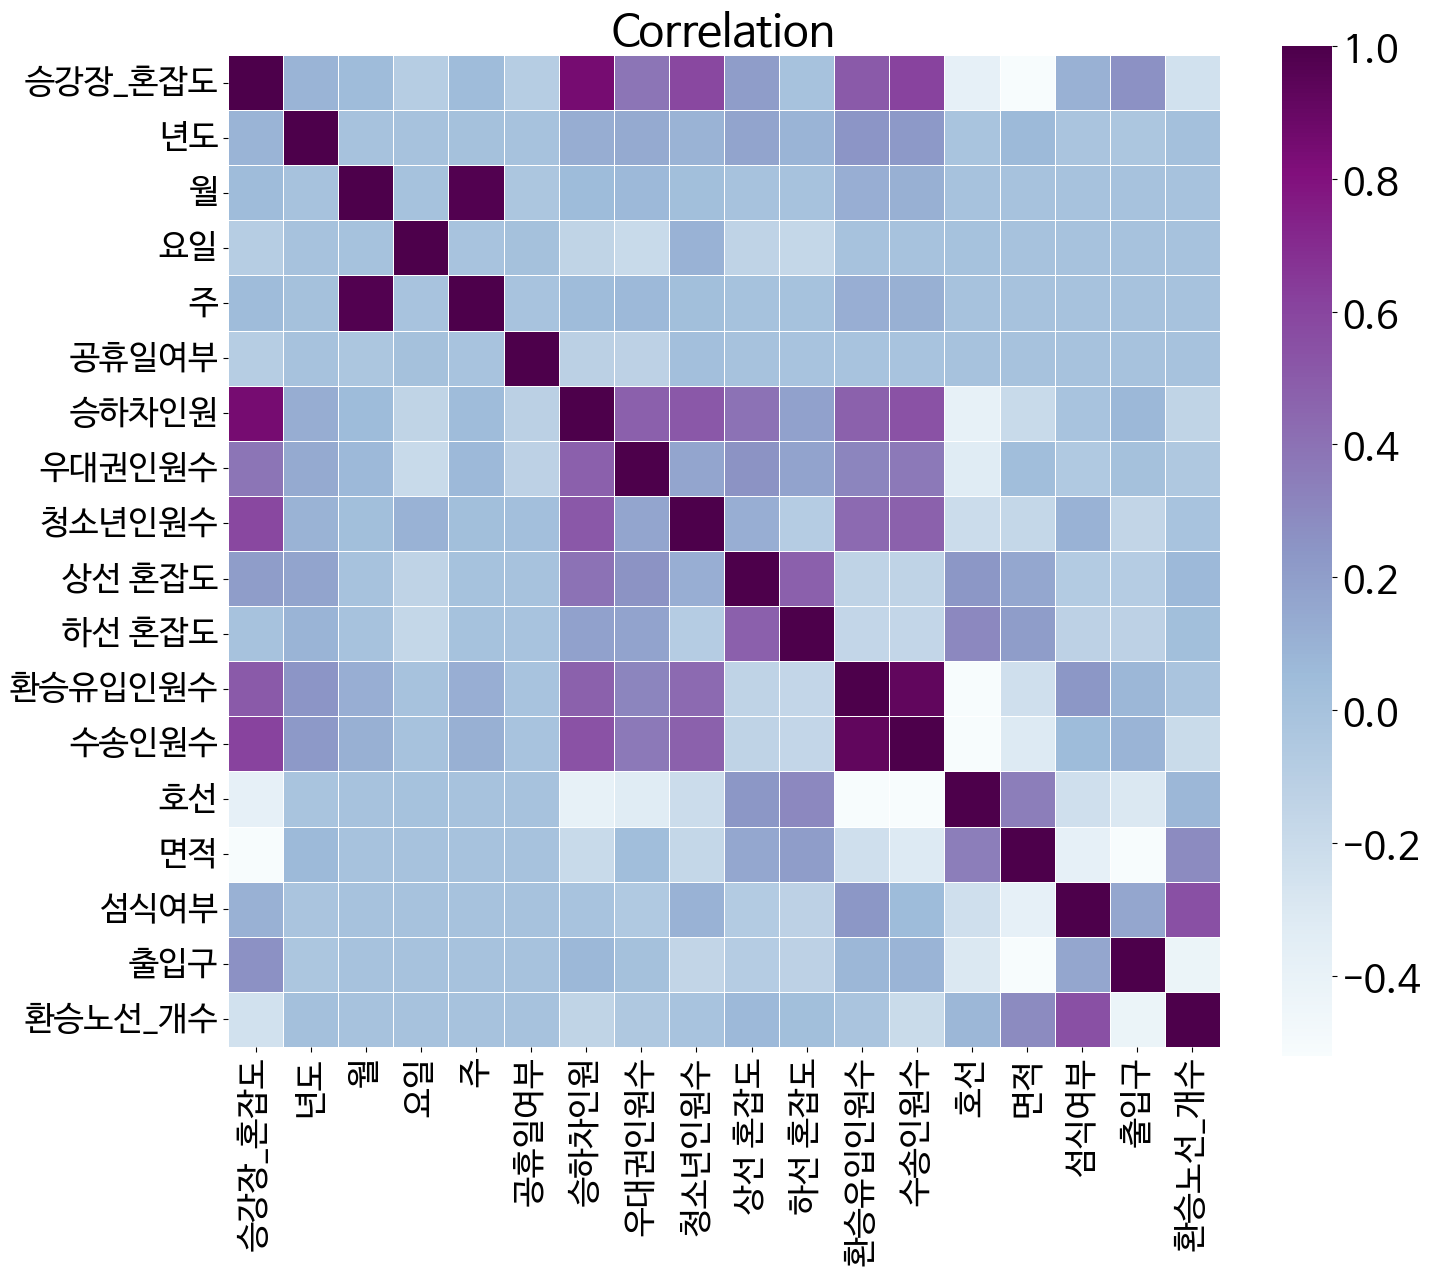

In [30]:
df_corr = df_stat[['승강장_혼잡도', '년도', '월', '요일', '주', '공휴일여부', 
         '승하차인원', '우대권인원수', '청소년인원수', '상선 혼잡도', '하선 혼잡도', '환승유입인원수', '수송인원수', 
         '호선', '면적', '섬식여부', '출입구', '환승노선_개수']].corr()
plot_heatmap(df_corr, fontsize=30, save_local=False)
plt.show()

# Descriptive

In [9]:
pd.concat([pd.concat([df_new['호선'].value_counts(), df_new['호선'].value_counts(normalize=True)], axis=1).sort_index(),
           df_new[['호선','역명']].drop_duplicates().groupby(['호선']).sum()], axis=1)

,count,proportion,역명
호선,,,
1,41610,0.0752,서울역
2,346748,0.6267,을지로입구신림신도림홍대입구선릉역삼잠실강남
3,41610,0.0752,고속터미널
4,41610,0.0752,서울역
7,41610,0.0752,고속터미널
8,40106,0.0725,잠실


In [10]:
df_new[['승강장혼잡도1']].describe().T

,count,mean,std,min,25%,50%,75%,max
승강장혼잡도1,"553,294.0000",59.9765,60.5998,0.2500,17.4044,38.1930,81.0391,502.3289


In [ ]:
# fig = px.box(df_new, x='호선', y='승강장혼잡도1', notched=True)
# fig.update_layout(width = 800, height = 500, bargap=0.1,
#                   yaxis_title='혼잡도',
#                   yaxis={'categoryorder':'total descending'},
#                   font=dict(size=16, color="black"))
# fig.show()

In [ ]:
# fig = px.box(df_new, x='역명', y='승강장혼잡도1', notched=True)
# fig.update_layout(width = 800, height = 500, bargap=0.1,
#                   yaxis_title='혼잡도', 
#                   xaxis={'categoryorder':'total descending'},
#                   font=dict(size=16, color="black"))
# fig.show()

In [ ]:
# descriptive_KK(df, target='혼잡도')

# Performance

## SCI

In [ ]:
# 데이터로딩
file_location = r'C:\DataScience\[DEBA]\Project-SubwayPrediction\Result\Performance_DataWizardd_20241114.xlsx'
df_result1 = pd.read_excel(file_location, sheet_name='승강장혼잡도(1)_기존', header=1)
# df_result1 = df_result1.set_index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
df_result2 = pd.read_excel(file_location, sheet_name='승강장혼잡도(2)_리틀', header=1)
# df_result2 = df_result2.set_index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
display(df_result1.head(), df_result2.head())

In [ ]:
df_rank = pd.DataFrame(np.zeros((7,12)))
for each1, each2 in df_result1.drop_duplicates().values:
    df_sub = df_result1[df_result1['Unnamed: 0'] == each1]
    df_sub = df_sub[df_sub['Unnamed: 1'] == each2]
#     display(table_highlight(df_sub, minmax='min', axis=0, new_index=None))
    df_rank = df_rank.add(df_sub.rank(method='min').values)
df_rank.columns = list(df_sub.columns)
df_rank.index = list(df_result1['Unnamed: 2'].unique())
display(table_highlight(df_rank.iloc[:, 5:] / 39, minmax='min', axis=0, new_index=None))

In [ ]:
df_opt = pd.DataFrame()
for algo in df_result1['Unnamed: 2'].unique():
    df_sub = df_result1[df_result1['Unnamed: 2'] == algo][['MSPE', 'MAPE', 'MedAPE']]
    df_opt = pd.concat([df_opt, df_sub.mean()], axis=1)
df_opt.columns = list(df_result1['Unnamed: 2'].unique())
df_opt.T.sort_values(by='MAPE')

## KCI

In [5]:
# 데이터로딩
# file_location = os.path.join('/mnt', 'c', 'DataScience', '[DEBA]', 'Project-SubwayPrediction(KCI)', 'Result', 'subway_result_kci.xlsx')
file_location = r'C:\DataScience\[DEBA]\[Project]\SubwayPrediction\Result\Performance_DataWizardd_KCI.xlsx'
top_stations = ['홍대입구', '강남', '서울역', '신림', '잠실', '고속터미널', '선릉', '역삼', '신도림', '을지로입구'] 
df_train = pd.read_excel(file_location, sheet_name='Train')
df_train = df_train[df_train['역명'].isin(top_stations)]
df_test = pd.read_excel(file_location, sheet_name='Test')

In [6]:
# Train
df_rank = pd.DataFrame(np.zeros((7,12)))
for each1, each2 in df_train.iloc[:,:2].drop_duplicates().values:
    df_sub = df_train[df_train['역명'] == each1]
    df_sub = df_sub[df_sub['호선'] == each2]
#     display(table_highlight(df_sub, minmax='min', axis=0, new_index=None))
    df_rank = df_rank.add(df_sub.rank(method='min').values)
df_rank.columns = list(df_sub.columns)
df_rank.index = list(df_train['알고리즘'].unique())
display(table_highlight(df_rank.iloc[:, 5:] / len(df_train.iloc[:,:2].drop_duplicates().values), minmax='min', axis=0, new_index=None))

# Test
df_rank = pd.DataFrame(np.zeros((7,12)))
for each1, each2 in df_test.iloc[:,:2].drop_duplicates().values:
    df_sub = df_test[df_test['역명'] == each1]
    df_sub = df_sub[df_sub['호선'] == each2]
#     display(table_highlight(df_sub, minmax='min', axis=0, new_index=None))
    df_rank = df_rank.add(df_sub.rank(method='min').values)
df_rank.columns = list(df_sub.columns)
df_rank.index = list(df_test['알고리즘'].unique())
display(table_highlight(df_rank.iloc[:, 5:] / len(df_test.iloc[:,:2].drop_duplicates().values), minmax='min', axis=0, new_index=None))

,MSE,RMSE,MSPE,MAE,MAPE,MedAE,MedAPE
Linear Regression,6.923077,6.923077,7.000000,6.923077,7.000000,6.923077,6.923077
Random Forest,1.153846,1.153846,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,4.230769,4.230769,4.692308,4.153846,4.384615,4.461538,4.230769
LightGBM,4.923077,4.923077,4.538462,5.076923,4.923077,5.076923,5.153846
CatBoost,5.923077,5.923077,5.769231,5.846154,5.692308,5.538462,5.692308
MLP,1.846154,1.846154,2.153846,2.000000,2.000000,2.000000,2.000000
CNN,3.000000,3.000000,2.846154,3.000000,3.000000,3.000000,3.000000


,MSE,RMSE,MSPE,MAE,MAPE,MedAE,MedAPE
Linear Regression,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Random Forest,1.923077,1.923077,1.000000,1.076923,1.000000,1.000000,1.000000
XGBoost,4.538462,4.538462,4.461538,4.461538,4.461538,4.461538,4.461538
LightGBM,4.538462,4.538462,4.692308,4.615385,4.538462,4.615385,4.615385
CatBoost,5.923077,5.923077,5.846154,5.923077,6.000000,5.923077,5.923077
MLP,1.384615,1.384615,2.538462,1.923077,2.307692,2.076923,2.076923
CNN,2.692308,2.692308,2.461538,3.000000,2.692308,2.923077,2.923077


In [7]:
# Train
df_opt = pd.DataFrame()
for algo in df_train['알고리즘'].unique():
    df_sub = df_train[df_train['알고리즘'] == algo][['MSPE', 'MAPE', 'MedAPE']]
    df_opt = pd.concat([df_opt, df_sub.mean()], axis=1)
df_opt.columns = list(df_train['알고리즘'].unique())
df_opt = df_opt.T.sort_values(by='MAPE')
display(df_opt)

# Test
df_opt = pd.DataFrame()
for algo in df_test['알고리즘'].unique():
    df_sub = df_test[df_test['알고리즘'] == algo][['MSPE', 'MAPE', 'MedAPE']]
    df_opt = pd.concat([df_opt, df_sub.mean()], axis=1)
df_opt.columns = list(df_test['알고리즘'].unique())
df_opt = df_opt.T.sort_values(by='MAPE')
display(df_opt)

,MSPE,MAPE,MedAPE
Random Forest,0.0000,0.0020,0.0686
MLP,0.0016,0.0145,0.7852
CNN,0.0038,0.0312,1.7671
XGBoost,0.0253,0.0894,6.0759
LightGBM,0.0211,0.0897,6.6431
CatBoost,0.0381,0.1147,8.8312
Linear Regression,0.7176,0.4336,30.8128


,MSPE,MAPE,MedAPE
Random Forest,0.0001,0.0032,0.1234
MLP,0.0017,0.0124,0.5244
CNN,0.0013,0.0137,0.6727
XGBoost,0.0091,0.0534,3.3208
LightGBM,0.0122,0.0537,3.3800
CatBoost,0.0310,0.0766,4.7205
Linear Regression,2.1766,0.5374,28.7237
